In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:

# Load your data
data = pd.read_csv('merged_data.csv')  # Replace with the actual path to your merged data file


In [ ]:
# Print column names to verify target columns are correctly labeled
print(data.columns)



Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes', 'age', 'sex', 'cp', 'trestbps', 'chol',
       'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')


In [ ]:
# Define the target columns
target_columns = ['Diabetes', 'hypertension', 'stroke']  # Adjust based on actual column names in your data

# Separate features (X) and targets (y)
X = data.drop(columns=target_columns)
y = data[target_columns]


In [ ]:
# Fill missing values for simplicity (mean or median could be used)
X = X.fillna(X.mean())
y = y.fillna(0)  # Assuming missing targets can be considered as 0; adjust as necessary


In [ ]:
# Convert continuous values in target columns to binary
y = y.apply(lambda x: x.apply(lambda val: 1 if val > 0 else 0))


In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Perform feature extraction using PCA
# Retain 95% of the variance in the data
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Random Forest Classifier on the training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Convert predictions to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=target_columns)

# Evaluate the model with `zero_division=0` to handle undefined metrics
print("Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_df))
print("Classification Report:\n", classification_report(y_test, y_pred_df, target_names=target_columns, zero_division=0))

accuracy_results={}
accuracy = accuracy_score(y_test, y_pred_df)
model_name = "RandomForest"  # Replace this with the actual name of the model, e.g., "Random Forest"
accuracy_results[model_name] = accuracy

Model Evaluation:
Accuracy Score: 0.8559755964702037
Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.72      0.76      0.74      7154
hypertension       0.99      0.93      0.96      1741
      stroke       0.99      1.00      1.00      4061

   micro avg       0.84      0.86      0.85     12956
   macro avg       0.90      0.89      0.90     12956
weighted avg       0.85      0.86      0.85     12956
 samples avg       0.36      0.36      0.36     12956




Confusion Matrix for Diabetes:
[[18326  2057]
 [ 1749  5405]]


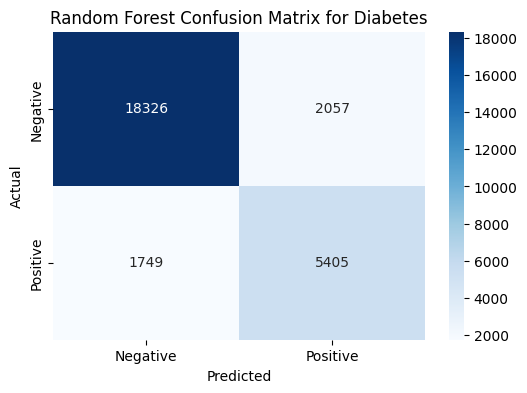


Confusion Matrix for hypertension:
[[25787     9]
 [  129  1612]]


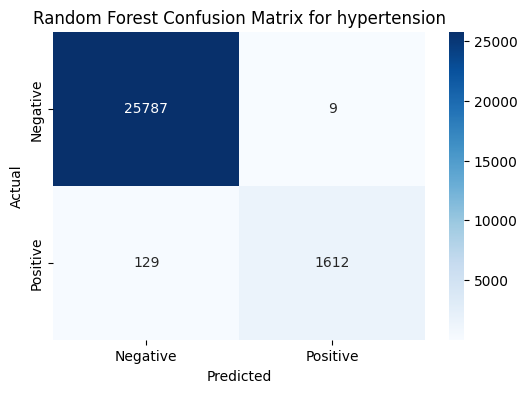


Confusion Matrix for stroke:
[[23451    25]
 [    0  4061]]


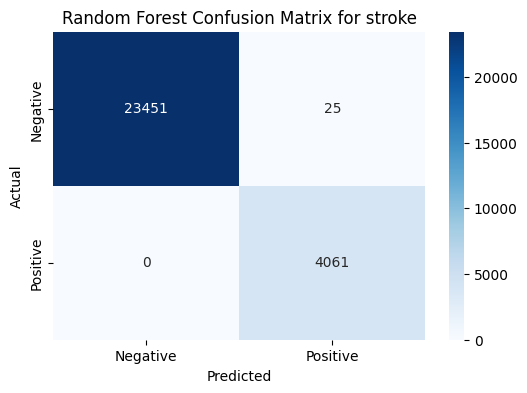

In [ ]:

for idx, target in enumerate(target_columns):
    print(f"\nConfusion Matrix for {target}:")
    cm = confusion_matrix(y_test.iloc[:, idx], y_pred_df.iloc[:, idx])
    print(cm)

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Random Forest Confusion Matrix for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
# Create and train XGBoost models for each target column
models = {}
for target in target_columns:
    model = xgb.XGBClassifier(eval_metric='logloss')  # Removed `use_label_encoder`
    model.fit(X_train, y_train[target])
    models[target] = model

# Make predictions for each target
y_pred = pd.DataFrame({target: model.predict(X_test) for target, model in models.items()})

# Print accuracy score and classification report
print("Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_columns, zero_division=0))

accuracy = accuracy_score(y_test, y_pred)
model_name = "XGBoost"  # Replace this with the actual name of the model, e.g., "Random Forest"
accuracy_results[model_name] = accuracy

Model Evaluation:
Accuracy Score: 0.8617859607074119
Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.74      0.79      0.77      7154
hypertension       0.97      0.86      0.92      1741
      stroke       0.98      1.00      0.99      4061

   micro avg       0.84      0.87      0.85     12956
   macro avg       0.90      0.89      0.89     12956
weighted avg       0.85      0.87      0.86     12956
 samples avg       0.36      0.36      0.36     12956




Confusion Matrix for Diabetes:
[[18402  1981]
 [ 1483  5671]]


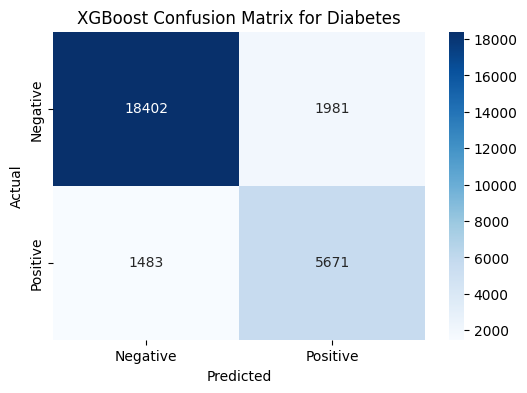


Confusion Matrix for hypertension:
[[25754    42]
 [  236  1505]]


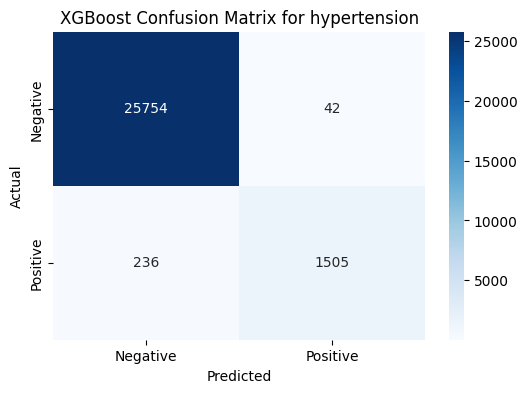


Confusion Matrix for stroke:
[[23398    78]
 [    0  4061]]


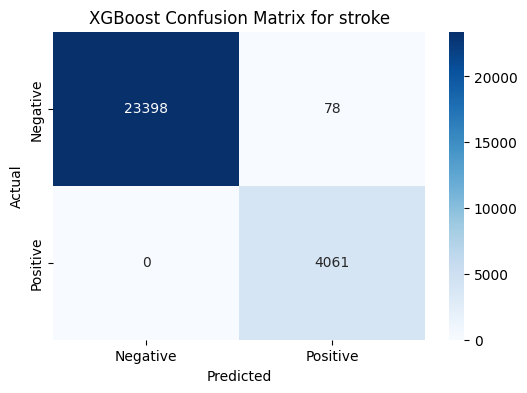

In [ ]:
for target in target_columns:
    print(f"\nConfusion Matrix for {target}:")
    cm = confusion_matrix(y_test[target], y_pred[target])
    print(cm)

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"XGBoost Confusion Matrix for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors
knn.fit(X_train, y_train)

# Make predictions using KNN
y_pred_knn = knn.predict(X_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=target_columns,zero_division=0))

accuracy = accuracy_score(y_test, y_pred_knn)
model_name = "KNN"  # Replace this with the actual name of the model, e.g., "Random Forest"
accuracy_results[model_name] = accuracy

K-Nearest Neighbors (KNN) Evaluation:
Accuracy Score: 0.7770999019501035
Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.70      0.73      0.71      7154
hypertension       0.76      0.74      0.75      1741
      stroke       0.74      0.95      0.83      4061

   micro avg       0.72      0.80      0.76     12956
   macro avg       0.73      0.80      0.76     12956
weighted avg       0.72      0.80      0.76     12956
 samples avg       0.33      0.33      0.33     12956




Confusion Matrix for Diabetes:
[[18200  2183]
 [ 1967  5187]]


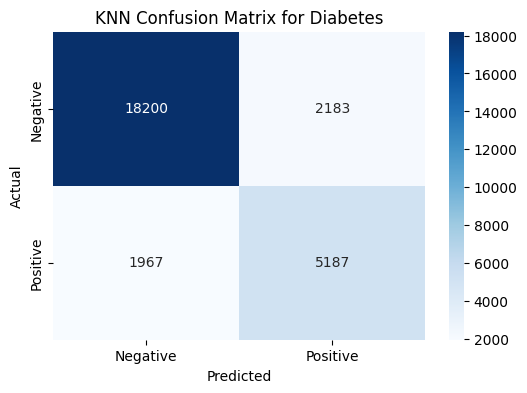


Confusion Matrix for hypertension:
[[25395   401]
 [  461  1280]]


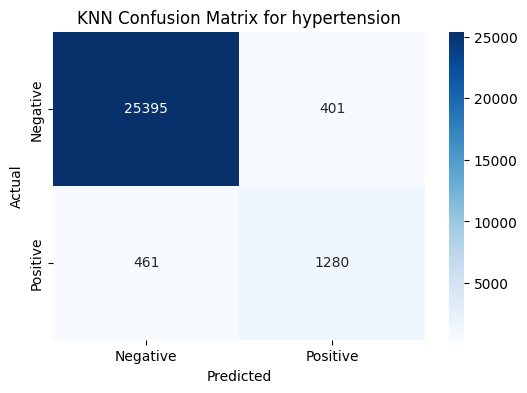


Confusion Matrix for stroke:
[[22097  1379]
 [  192  3869]]


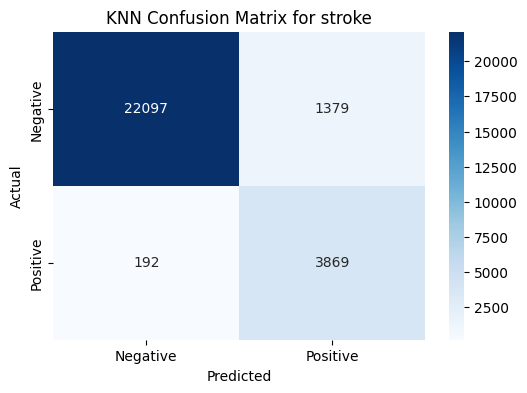

In [ ]:
# Confusion Matrix for each target column
for idx, target in enumerate(target_columns):
    print(f"\nConfusion Matrix for {target}:")
    cm = confusion_matrix(y_test.iloc[:, idx], y_pred_knn[:, idx])
    print(cm)

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"KNN Confusion Matrix for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate Logistic Regression for each target
for target in target_columns:
    print(f"Training Logistic Regression for target: {target}")

    # Train the model
    log_reg = LogisticRegression(max_iter=2000)  # Increased max_iter
    log_reg.fit(X_train_scaled, y_train[target])  # Train on one target at a time

    # Make predictions
    y_pred_log_reg = log_reg.predict(X_test_scaled)

    # Evaluate the model
    print(f"Logistic Regression Evaluation for {target}:")
    print("Accuracy Score:", accuracy_score(y_test[target], y_pred_log_reg))
    print("Classification Report:\n", classification_report(y_test[target], y_pred_log_reg))

accuracy = accuracy_score(y_test[target], y_pred_log_reg)
model_name = "LogReg"  # Replace this with the actual name of the model, e.g., "Random Forest"
accuracy_results[model_name] = accuracy

Training Logistic Regression for target: Diabetes
Logistic Regression Evaluation for Diabetes:
Accuracy Score: 0.8480226604205251
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90     20383
           1       0.81      0.54      0.65      7154

    accuracy                           0.85     27537
   macro avg       0.83      0.75      0.78     27537
weighted avg       0.84      0.85      0.84     27537

Training Logistic Regression for target: hypertension
Logistic Regression Evaluation for hypertension:
Accuracy Score: 0.9358681047318154
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     25796
           1       0.07      0.00      0.00      1741

    accuracy                           0.94     27537
   macro avg       0.50      0.50      0.48     27537
weighted avg       0.88      0.94      0.91     27537

Training Logistic Regression f

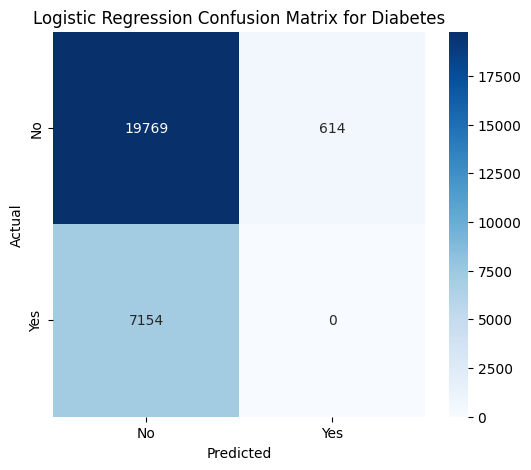

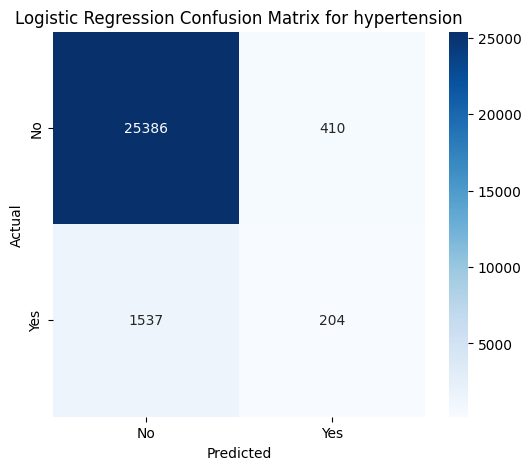

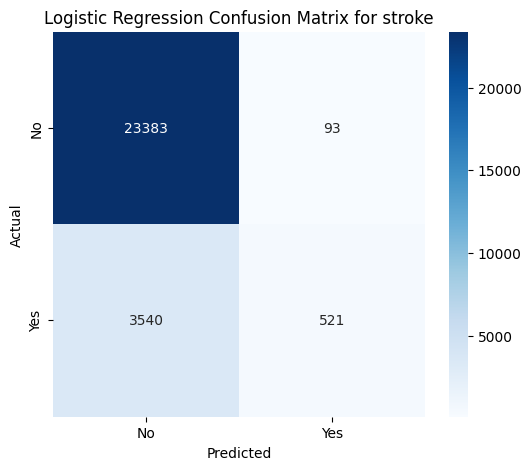

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, target_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"{model_name} Confusion Matrix for {target_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example: Confusion Matrix for Logistic Regression on "Diabetes"
for target in target_columns:
    y_pred_log_reg = log_reg.predict(X_test_scaled)  # Ensure predictions for the target
    plot_confusion_matrix(y_test[target], y_pred_log_reg, "Logistic Regression", target)


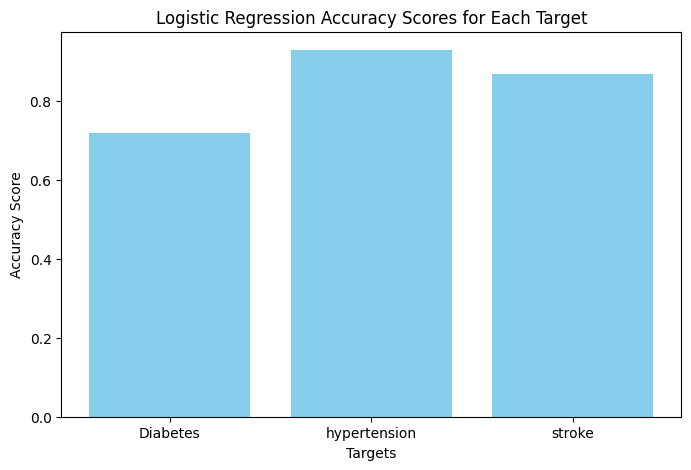

In [ ]:
# Store accuracy scores for all targets
accuracy_scores = {}
for target in target_columns:
    y_pred_log_reg = log_reg.predict(X_test_scaled)
    accuracy_scores[target] = accuracy_score(y_test[target], y_pred_log_reg)

# Plot the accuracy scores
plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel("Targets")
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression Accuracy Scores for Each Target")
plt.show()


Linear Regression Evaluation for Diabetes:
Mean Squared Error (MSE): 0.1509088783984613
R-squared (R2): 0.21525058581730105
--------------------------------------------------
Confusion Matrix for Diabetes:
[[19983   400]
 [ 4715  2439]]


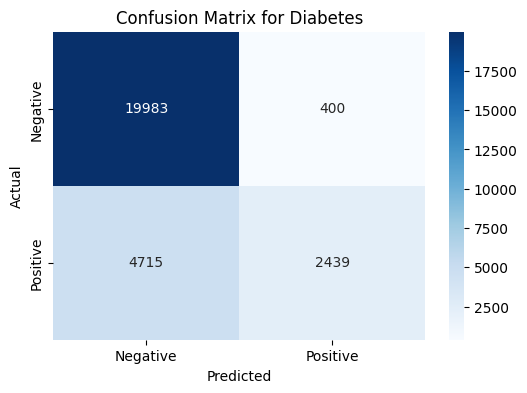

Linear Regression Evaluation for hypertension:
Mean Squared Error (MSE): 0.0569684159502299
R-squared (R2): 0.038130279325427785
--------------------------------------------------
Confusion Matrix for hypertension:
[[25796     0]
 [ 1741     0]]


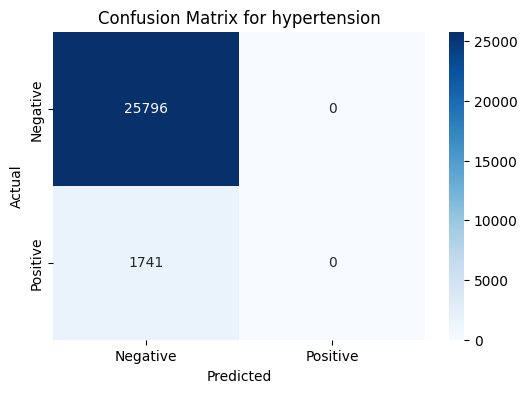

Linear Regression Evaluation for stroke:
Mean Squared Error (MSE): 0.11712953983551427
R-squared (R2): 0.06837186450134192
--------------------------------------------------
Confusion Matrix for stroke:
[[23420    56]
 [ 3688   373]]


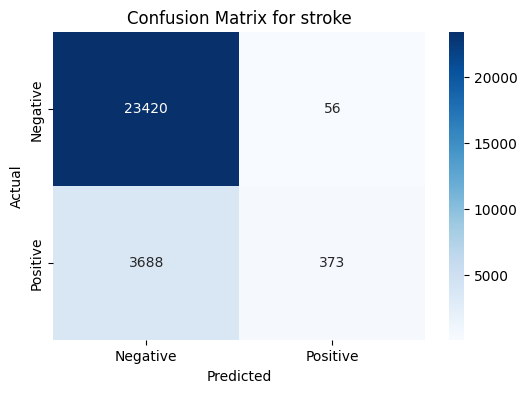

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store evaluation metrics for each target column
linear_regression_results = {}

# Loop through each target column
for target in target_columns:
    # Train a Linear Regression model for the current target
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train[target])

    # Make predictions using the Linear Regression model
    y_pred_lin_reg = lin_reg.predict(X_test)

    # Evaluate the Linear Regression model
    mse = mean_squared_error(y_test[target], y_pred_lin_reg)
    r2 = r2_score(y_test[target], y_pred_lin_reg)

    # Store the results in the dictionary
    linear_regression_results[target] = {
        "Mean Squared Error (MSE)": mse,
        "R-squared (R2)": r2
    }

    # Print the evaluation metrics for the current target
    print(f"Linear Regression Evaluation for {target}:")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    print("-" * 50)

    # Convert continuous predictions to binary using a threshold (e.g., 0.5)
    y_pred_binary = (y_pred_lin_reg >= 0.5).astype(int)

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test[target], y_pred_binary)
    print(f"Confusion Matrix for {target}:\n{cm}")

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
accuracy =r2_score(y_test[target], y_pred_lin_reg)
model_name = "LinearReg"  # Replace this with the actual name of the model, e.g., "Random Forest"
accuracy_results[model_name] = accuracy

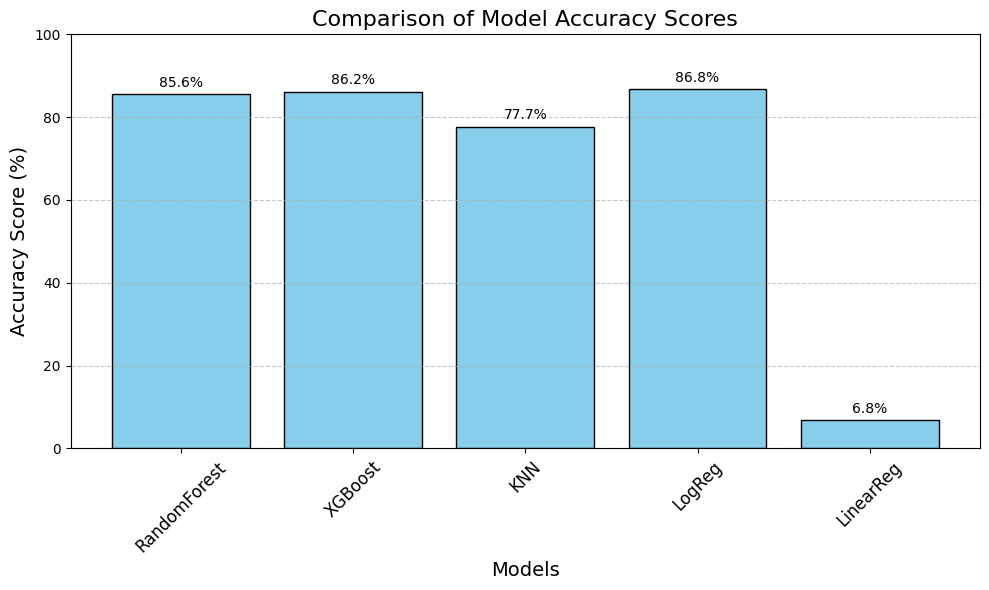

In [ ]:
import matplotlib.pyplot as plt

# Assuming accuracy_results is already populated
models = list(accuracy_results.keys())
accuracy_scores = list(accuracy_results.values())

# Convert accuracy scores to percentages
accuracy_percentages = [score * 100 for score in accuracy_scores]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_percentages, color='skyblue', edgecolor='black')
plt.title('Comparison of Model Accuracy Scores', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score (%)', fontsize=14)  # Updated y-axis label
plt.ylim(0, 100)  # Set range for percentages
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)

# Annotate each bar with the percentage value
for bar, percentage in zip(bars, accuracy_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
